# 1. load drive and install and load dependencies

In [1]:
#Start by connecting gdrive into the google colab

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!pip install pycaret

     |████████████████████████████████| 266 kB 16.0 MB/s 
     |████████████████████████████████| 2.0 MB 38.7 MB/s 
     |████████████████████████████████| 86 kB 5.3 MB/s 
     |████████████████████████████████| 1.7 MB 40.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.3 MB 60.1 MB/s 
     |████████████████████████████████| 113 kB 64.9 MB/s 
     |████████████████████████████████| 261 kB 65.3 MB/s 
     |████████████████████████████████| 56 kB 4.7 MB/s 
     |████████████████████████████████| 16.9 MB 95 kB/s 
     |████████████████████████████████| 167 kB 57.2 MB/s 
     |████████████████████████████████| 6.8 MB 40.5 MB/s 
     |████████████████████████████████| 102 kB 11.5 MB/s 
     |████████████████████████████████| 10.1 MB 42.1 MB/s 
     |████████████████████████████████| 596 kB 57.1 MB/s 
     |█████████████████

In [3]:
!pip install scanpy

     |████████████████████████████████| 2.0 MB 14.1 MB/s 
     |████████████████████████████████| 91 kB 8.2 MB/s 
     |████████████████████████████████| 63 kB 2.1 MB/s 
  Created wheel for sinfo: filename=sinfo-0.3.4-py3-none-any.whl size=7899 sha256=ae78b59a040e5492e107c35ff0518d34f8e3b97fa4d3032a03674ff093ad0914
  Stored in directory: /root/.cache/pip/wheels/68/ca/56/344d532fe53e855ccd6549795d370588ab8123907eecf4cf30
Successfully built sinfo


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pycaret

# 2. import data

In [5]:
!unzip '/content/gdrive/MyDrive/Idorsia Capstone Project/data/pca_data.zip'

Archive:  /content/gdrive/MyDrive/Idorsia Capstone Project/data/pca_data.zip
  inflating: pca_data.csv            


In [6]:
df = pd.read_csv('pca_data.csv')
df.head()

,Unnamed: 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,cell_state
0,GSM3148575_AAACCTGAGCAGACTG,6.918734,-5.430524,-5.934304,-5.132598,1.257261,-4.486886,-0.617733,-0.260068,-1.264563,3.596646,2.086040,1.914667,4.873919,-0.369806,-0.925603,1.311917,0.925094,0.120551,1.124421,1.906007,1.226803,0.643076,2.262795,1.109645,-0.190924,2.457812,-2.650853,0.281783,-1.228190,1.024622,-0.403749,0.395911,-0.134256,-1.001416,2.710131,2.867136,-0.052171,-1.017120,0.970193,1.078939,0.763181,-0.974815,0.304716,2.475712,-0.227740,1.089021,-1.379492,-1.724489,0.727861,0.959556,CD8 exhausted T-cell (unspecified)
1,GSM3148575_AAACCTGAGGTCGGAT,6.481100,5.917336,-1.208722,0.790335,-5.729861,-0.235486,-0.798798,-1.673697,0.992981,2.014384,1.197686,3.126476,2.299061,-1.529358,0.477961,-1.135993,2.339923,0.873401,0.002629,1.755137,-1.014675,1.753415,-0.149313,-0.458066,-0.796815,-1.306341,-0.335694,-0.160202,-0.239191,-0.679422,0.199933,-0.826625,-1.970399,-0.613103,-0.389284,-1.541020,0.195096,-0.834788,-1.085860,0.075480,-0.421840,-1.777539,1.433072,0.176093,0.292241,0.198317,-1.676759,-1.558137,0.503436,-0.545312,CD8 T-cell (unspecified)
2,GSM3148575_AAACCTGAGTGTACCT,5.788861,6.837175,-0.887075,5.646618,0.523669,-1.265495,-2.007347,-2.527674,0.265183,-1.956149,-1.198070,0.801297,-0.911915,-0.998997,-2.779241,-2.369006,1.254288,1.719373,0.718629,-0.177771,-0.804413,1.009628,1.237071,1.228712,0.633373,1.198361,-0.295055,-0.885894,1.111512,0.941895,0.721014,-1.297449,0.190606,0.974933,-0.546057,0.631332,-0.102032,-1.091253,-1.079537,-0.659000,-1.234536,-1.315012,-0.349012,0.262349,2.020753,1.190537,0.790291,0.088697,-1.158267,-0.190613,CD4 regulatory T-cell (unspecified)
3,GSM3148575_AAACCTGAGTGTACTC,5.108254,-7.165000,-8.003197,-6.768706,3.072275,-2.210504,-0.178368,1.110728,3.006974,-1.685400,1.482924,0.795629,3.881558,-0.393929,-0.862719,3.387931,0.666578,-2.843199,1.042368,4.187947,-0.359032,0.731889,0.669591,3.103710,-1.950703,1.757820,-2.452799,0.704643,-2.356638,1.939687,1.132096,0.551286,-1.746684,0.092801,1.380779,-1.638370,-1.705521,-0.729765,2.299366,1.412258,1.045634,1.368334,1.171300,1.354746,-1.115841,0.397382,-0.240331,-0.744143,-0.891667,0.930065,CD8 exhausted T-cell (unspecified)
4,GSM3148575_AAACCTGCAACACCCG,11.084245,1.923271,-1.023140,8.029376,-2.299359,2.284066,-6.615127,-2.620251,-4.312167,0.839962,-0.770186,0.829490,2.489371,-1.581365,0.143728,1.558536,2.591930,1.499460,-0.846908,-0.946084,0.991319,0.979579,0.593032,3.374414,0.504460,0.188853,-0.415865,-1.216265,-0.532730,0.123159,0.259860,-1.989235,-0.896384,-0.197704,1.172842,1.311405,1.824415,0.998337,-1.210659,0.074916,-2.456988,-1.737955,-2.472423,-2.025937,1.706594,-0.141557,0.035906,1.043848,-0.449964,0.860397,CD4 naive T-cell


In [7]:
!unzip '/content/gdrive/MyDrive/Idorsia Capstone Project/data/subset_30.zip'

Archive:  /content/gdrive/MyDrive/Idorsia Capstone Project/data/subset_30.zip
  inflating: subset_30.csv           


In [8]:
df_30 = pd.read_csv('subset_30.csv', index_col = 0)
df_30.head()

,PLEKHN1,ISG15,TNFRSF18,TNFRSF4,DVL1,CCNL2,MIB2,SLC35E2B,CDK11A,SKI,PLCH2,KCNAB2,ACOT7,TNFRSF25,RERE,ENO1,PIK3CD,CLSTN1,SRM,FBXO2,FBXO44,AGTRAP,MTHFR,CLCN6,TNFRSF1B,VPS13D,DHRS3,PRDM2,EFHD2,DDI2,SPEN,CROCC,ATP13A2,UBR4,OTUD3,ECE1,USP48,LUZP1,ID3,RPL11,...,APP,MAP3K7CL,BACH1,TIAM1,SOD1,EVA1C,PAXBP1,IFNGR2,MRPS6,SLC5A3,RUNX1,CBR3,TTC3,DYRK1A,ETS2,HMGN1,MX2,MX1,ABCG1,UBASH3A,PKNOX1,CSTB,ITGB2,ADARB1,COL18A1,LSS,MCM3AP,PCNT,DIP2A,MT-ND1,MT-ND2,MT-CO1,MT-CO2,MT-ATP6,MT-CO3,MT-ND4,MT-ND5,MT-CYB,cell_state,cell_type
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GSM3721462_TTAACTCGTGGTCCGT,-0.107822,1.051505,2.883262,2.432532,-0.109245,-0.396519,-0.311899,-0.228958,-0.374381,-0.314901,-0.123083,-0.478353,-0.121983,-0.410996,-0.317847,1.079731,-0.391834,2.974507,-0.301609,-0.098347,-0.279872,-0.395123,-0.191592,-0.141523,2.747149,-0.286109,-0.258971,-0.405238,2.290373,-0.221732,-0.336877,-0.186678,-0.190720,-0.397566,-0.121845,-0.290821,-0.388675,-0.311518,-0.330698,-0.205876,...,-0.280496,-0.108033,-0.378217,-0.303091,1.793907,-0.161401,4.651855,-0.297566,-0.692460,-0.375107,-0.377831,-0.095107,-0.533894,-0.263100,-0.352260,-1.154305,-0.382664,-0.426481,-0.379495,-0.342781,-0.212108,0.508784,-0.968659,-0.167294,-0.175711,-0.158574,-0.314983,-0.196282,-0.375283,-1.761688,-0.432253,0.329213,0.979543,0.790286,0.796424,0.370406,0.648496,1.069004,CD4 regulatory T-cell (unspecified),T-cell
ERS3566166_TTAGGACGTATCGCAT,-0.063655,1.507653,2.670236,-0.142561,-0.135437,-0.394918,3.389801,-0.269016,2.823940,-0.359724,-0.094244,-0.434981,-0.189475,-0.235168,-0.368243,-0.923308,-0.340171,-0.306440,-0.214260,-0.094144,-0.236329,-0.306553,-0.231763,-0.188861,-0.591062,-0.322846,-0.314922,-0.458404,2.475220,-0.198593,-0.366953,-0.152740,-0.180766,-0.427092,-0.135466,-0.284995,-0.375764,-0.263782,-0.403794,-0.931781,...,-0.302923,-0.147672,-0.395308,-0.210619,0.566931,-0.157472,-0.211639,-0.283868,-0.457814,-0.286747,-0.342757,-0.138169,-0.573991,-0.310218,-0.326078,-1.110088,-0.238186,-0.205472,2.835677,-0.192411,-0.171109,0.858273,2.118469,-0.197778,-0.206334,-0.164395,-0.345497,-0.283872,-0.360782,-0.247293,0.725249,-0.654162,-0.337532,-0.868864,0.054169,0.341223,-1.366824,-1.693424,CD8 exhausted cytotoxic T-cell (unspecified),T-cell
GSM4143657_GTATTCTGTGGCGAAT,-0.113647,0.480302,-0.515310,-0.505588,-0.108071,1.590379,-0.313657,-0.220113,-0.364669,2.120046,6.166434,1.260205,-0.260681,-0.442320,-0.305378,0.980242,-0.375075,-0.338135,-0.378109,-0.098390,-0.273910,-0.412770,-0.195258,-0.143248,-0.767891,2.455667,-0.260026,-0.404972,1.378897,-0.238459,-0.356384,-0.180861,-0.196920,-0.402247,-0.125187,-0.321445,1.539020,-0.322930,-0.362763,0.687239,...,2.432226,-0.136461,-0.406624,-0.327391,0.134323,-0.162440,-0.213711,-0.451615,-0.799243,-0.395797,-0.404153,-0.150954,-0.551123,-0.260729,-0.372876,-0.166995,-0.382728,-0.475363,-0.420067,-0.360509,-0.235100,-0.072508,0.625717,-0.157375,-0.179278,-0.167442,-0.312845,-0.214009,-0.357135,0.161567,0.077252,-0.491519,0.435404,0.563995,0.375063,1.105832,0.026785,0.233371,CD4 helper T-cell (unspecified),T-cell
GSM3511757_TTGACTTCAAACAACA,-0.117449,-0.672047,-0.491876,-0.484852,-0.100217,-0.398654,-0.333986,-0.231560,-0.375638,-0.296662,-0.124381,-0.493961,-0.168745,-0.457732,-0.306684,1.827102,-0.403985,-0.350837,-0.330297,-0.108919,-0.304182,-0.401522,-0.176835,-0.128035,-0.753513,-0.281455,-0.258681,-0.395121,-0.404980,-0.216367,-0.334333,-0.191253,-0.192640,-0.383314,-0.128038,3.274703,-0.399176,-0.309047,-0.330898,-0.375920,...,-0.263550,-0.110059,-0.346198,-0.305871,0.030387,-0.178059,-0.212737,-0.253249,0.964312,2.300342,-0.369430,-0.109067,3.033242,-0.252673,-0.293199,0.298238,-0.394649,-0.472961,-0.401968,-0.380347,-0.215548,0.436071,-0.975147,-0.162729,-0.181099,-0.155006,-0.311501,-0.193034,2.493191,1.230001,0.532403,0.197154,0.532417,0.726922,1.634403,-1.353829,0.354251,-0.382876,CD8 memory T-cell (unspecified),T-cell
GSM4143657_GCGGGTTCAGAAGCAC,-0.121376,

## add cell_type column

In [ ]:
category_dict = {
   'CD4 naive T-cell': 'T-cell',
   'CD4 regulatory T-cell (unspecified)': 'T-cell',
   'CD8 effector memory T-cell': 'T-cell',
   'CD4 helper T-cell (unspecified)': 'T-cell',
   'CD8 memory T-cell (unspecified)': 'T-cell',
   'CD4 follicular helper T-cell': 'T-cell',
   'CD8 T-cell (unspecified)': 'T-cell',
   'CD8 resident memory T-cell': 'T-cell',
   'B-cell (unspecified)': 'B-cell',
   'CD8 activated T-cell (unspecified)': 'T-cell',
   'macrophage': 'macrophage',
   'plasma cell': 'plasma cell',
   'CD8 exhausted T-cell (unspecified)': 'T-cell',
   'natural killer cell': 'killer cell',
   'CD8 exhausted resident memory T-cell': 'T-cell',
   'NK T-cell (unspecified)': 'T-cell',
   'Th17 T-cell': 'T-cell',
   'M2 macrophage': 'macrophage',
   'CD8 cytotoxic T-cell (unspecified)': 'T-cell',
   'classical monocyte': 'monocyte',
   'CD4 T-cell (unspecified)': 'T-cell',
   'GC-dependent memory B-cell': 'B-cell',
   'T-cell (unspecified)': 'T-cell',
   'non-classical monocyte': 'monocyte',
   'lymphocyte': 'lymphocyte',
   'naive B-cell': 'B-cell',
   'granulocyte': 'granulocyte',
   'conventional dendritic cell': 'dendritic cell',
   'CD8 exhausted cytotoxic T-cell (unspecified)': 'T-cell',
   'mast cell': 'mast cell',
   'conventional dendritic cell 2': 'dendritic cell',
   'plasmacytoid dendritic cell': 'dendritic cell',
   'dendritic cell': 'dendritic cell',
   'CD8 naive T-cell': 'T-cell',
   'leukocyte': 'leukocyte',
   'M1 macrophage': 'macrophage',
   'perivascular M2 macrophage': 'macrophage',
   'myeloid cell (unspecified)': 'myeloid cell',
   'CD4 central memory T-cell': 'T-cell',
   'GC-independent memory B-cell': 'B-cell',
   'CD8 central memory T-cell': 'T-cell',
   'conventional dendritic cell 1': 'dendritic cell',
   'gd T-cell (unspecified)': 'T-cell'
}

In [ ]:
df['cell_type'] = df['cell_state'].apply(lambda cell: category_dict[cell])
df.head()

,Unnamed: 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,cell_state,cell_type
0,GSM3148575_AAACCTGAGCAGACTG,6.918734,-5.430524,-5.934304,-5.132598,1.257261,-4.486886,-0.617733,-0.260068,-1.264563,3.596646,2.086040,1.914667,4.873919,-0.369806,-0.925603,1.311917,0.925094,0.120551,1.124421,1.906007,1.226803,0.643076,2.262795,1.109645,-0.190924,2.457812,-2.650853,0.281783,-1.228190,1.024622,-0.403749,0.395911,-0.134256,-1.001416,2.710131,2.867136,-0.052171,-1.017120,0.970193,1.078939,0.763181,-0.974815,0.304716,2.475712,-0.227740,1.089021,-1.379492,-1.724489,0.727861,0.959556,CD8 exhausted T-cell (unspecified),T-cell
1,GSM3148575_AAACCTGAGGTCGGAT,6.481100,5.917336,-1.208722,0.790335,-5.729861,-0.235486,-0.798798,-1.673697,0.992981,2.014384,1.197686,3.126476,2.299061,-1.529358,0.477961,-1.135993,2.339923,0.873401,0.002629,1.755137,-1.014675,1.753415,-0.149313,-0.458066,-0.796815,-1.306341,-0.335694,-0.160202,-0.239191,-0.679422,0.199933,-0.826625,-1.970399,-0.613103,-0.389284,-1.541020,0.195096,-0.834788,-1.085860,0.075480,-0.421840,-1.777539,1.433072,0.176093,0.292241,0.198317,-1.676759,-1.558137,0.503436,-0.545312,CD8 T-cell (unspecified),T-cell
2,GSM3148575_AAACCTGAGTGTACCT,5.788861,6.837175,-0.887075,5.646618,0.523669,-1.265495,-2.007347,-2.527674,0.265183,-1.956149,-1.198070,0.801297,-0.911915,-0.998997,-2.779241,-2.369006,1.254288,1.719373,0.718629,-0.177771,-0.804413,1.009628,1.237071,1.228712,0.633373,1.198361,-0.295055,-0.885894,1.111512,0.941895,0.721014,-1.297449,0.190606,0.974933,-0.546057,0.631332,-0.102032,-1.091253,-1.079537,-0.659000,-1.234536,-1.315012,-0.349012,0.262349,2.020753,1.190537,0.790291,0.088697,-1.158267,-0.190613,CD4 regulatory T-cell (unspecified),T-cell
3,GSM3148575_AAACCTGAGTGTACTC,5.108254,-7.165000,-8.003197,-6.768706,3.072275,-2.210504,-0.178368,1.110728,3.006974,-1.685400,1.482924,0.795629,3.881558,-0.393929,-0.862719,3.387931,0.666578,-2.843199,1.042368,4.187947,-0.359032,0.731889,0.669591,3.103710,-1.950703,1.757820,-2.452799,0.704643,-2.356638,1.939687,1.132096,0.551286,-1.746684,0.092801,1.380779,-1.638370,-1.705521,-0.729765,2.299366,1.412258,1.045634,1.368334,1.171300,1.354746,-1.115841,0.397382,-0.240331,-0.744143,-0.891667,0.930065,CD8 exhausted T-cell (unspecified),T-cell
4,GSM3148575_AAACCTGCAACACCCG,11.084245,1.923271,-1.023140,8.029376,-2.299359,2.284066,-6.615127,-2.620251,-4.312167,0.839962,-0.770186,0.829490,2.489371,-1.581365,0.143728,1.558536,2.591930,1.499460,-0.846908,-0.946084,0.991319,0.979579,0.593032,3.374414,0.504460,0.188853,-0.415865,-1.216265,-0.532730,0.123159,0.259860,-1.989235,-0.896384,-0.197704,1.172842,1.311405,1.824415,0.998337,-1.210659,0.074916,-2.456988,-1.737955,-2.472423,-2.025937,1.706594,-0.141557,0.035906,1.043848,-0.449964,0.860397,CD4 naive T-cell,T-cell


In [ ]:
count_celltype = pd.concat([pd.DataFrame({'count': df['cell_type'].value_counts()}), pd.DataFrame({'percentage': df['cell_type'].value_counts(normalize=True)})], axis=1)
count_celltype

,count,percentage
T-cell,83066,0.765416
B-cell,7084,0.065276
macrophage,6126,0.056448
plasma cell,3073,0.028316
killer cell,2593,0.023893
monocyte,2089,0.019249
dendritic cell,1995,0.018383
lymphocyte,884,0.008146
granulocyte,800,0.007372
mast cell,505,0.004653


# Split pca data into train and test

In [ ]:
cells = df_30.index
cells

Index(['GSM3721462_TTAACTCGTGGTCCGT', 'ERS3566166_TTAGGACGTATCGCAT',
       'GSM4143657_GTATTCTGTGGCGAAT', 'GSM3511757_TTGACTTCAAACAACA',
       'GSM4143657_GCGGGTTCAGAAGCAC', 'ERS3858523_GTTTCTAGTCAACTGT',
       'ERS3858523_TCAACGATCTTACCGC', 'GSM3148579_GATTCAGAGAAGGTTT',
       'GSM3721449_AGAGCGATCTCGTATT', 'GSM3148579_CTGCCTAAGAGGGATA',
       ...
       'GSM3511752_ACATGGTTCCACTGGG', 'GSM3511756_GTGTTAGGTACTTCTT',
       'GSM3721449_TGAGCCGTCTGCAAGT', 'SRR6737171_CGTGAGCTCAAGCCTA',
       'GSM3148578_CACATAGTCAGGATCT', 'GSM3511757_GAACGGAGTAAAGGAG',
       'ERS2657940_CACCAGGGTTCAGTAC', 'GSM3721455_TCTCTAACAGCCAATT',
       'GSM3721462_TATGCCCTCGAACGGA', 'GSM3148575_AAGCCGCTCTGGTATG'],
      dtype='object', name='Unnamed: 0', length=32557)

In [ ]:
df_test = df[df['Unnamed: 0'].isin(cells)] # get cells that are in subset_30 dataset (test dataset)
df_test = df_test.set_index('Unnamed: 0')
df_test = df_test.reindex(df_30.index)
len(df_test)

32557

In [ ]:
df_train = df[~df['Unnamed: 0'].isin(cells)] # get cells that are not in subset_30 dataset (test dataset)
df_train = df_train.set_index('Unnamed: 0')
df_train.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,cell_state,cell_type
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GSM3148575_AAACCTGAGGTCGGAT,6.481100,5.917336,-1.208722,0.790335,-5.729861,-0.235486,-0.798798,-1.673697,0.992981,2.014384,1.197686,3.126476,2.299061,-1.529358,0.477961,-1.135993,2.339923,0.873401,0.002629,1.755137,-1.014675,1.753415,-0.149313,-0.458066,-0.796815,-1.306341,-0.335694,-0.160202,-0.239191,-0.679422,0.199933,-0.826625,-1.970399,-0.613103,-0.389284,-1.541020,0.195096,-0.834788,-1.085860,0.075480,-0.421840,-1.777539,1.433072,0.176093,0.292241,0.198317,-1.676759,-1.558137,0.503436,-0.545312,CD8 T-cell (unspecified),T-cell
GSM3148575_AAACCTGCAACACCCG,11.084245,1.923271,-1.023140,8.029376,-2.299359,2.284066,-6.615127,-2.620251,-4.312167,0.839962,-0.770186,0.829490,2.489371,-1.581365,0.143728,1.558536,2.591930,1.499460,-0.846908,-0.946084,0.991319,0.979579,0.593032,3.374414,0.504460,0.188853,-0.415865,-1.216265,-0.532730,0.123159,0.259860,-1.989235,-0.896384,-0.197704,1.172842,1.311405,1.824415,0.998337,-1.210659,0.074916,-2.456988,-1.737955,-2.472423,-2.025937,1.706594,-0.141557,0.035906,1.043848,-0.449964,0.860397,CD4 naive T-cell,T-cell
GSM3148575_AAACCTGCACCCATGG,7.670421,0.558138,1.386510,-5.014564,-0.916848,0.064384,2.082932,-0.442803,-1.710666,1.037410,0.580227,7.602390,1.878071,-2.948012,-0.675660,0.623930,-0.578028,-1.090966,0.994528,0.077175,-1.795574,-1.894433,-1.132679,-0.039605,0.989742,-1.649795,-2.109513,-0.675437,0.345807,-0.791065,3.348352,-2.107793,1.774473,2.361114,0.119093,0.250036,-1.536456,-1.223522,0.738385,3.377066,3.474761,0.690107,-0.166768,-1.508768,-0.039762,2.174355,-0.361345,0.437573,-2.181939,1.047686,CD8 activated T-cell (unspecified),T-cell
GSM3148575_AAACCTGCAGATGGGT,9.455652,-0.826634,-2.874930,-2.113662,-3.168251,-1.550202,-0.169521,-0.266947,-0.066584,-1.110948,-1.196856,3.516318,2.060829,-0.839665,-1.123929,1.488965,1.368439,-0.639098,-1.935935,1.010560,-1.126551,0.549937,1.724352,2.734371,-0.021184,-1.898747,-1.551696,0.148557,-0.638644,0.203681,1.293199,-0.147220,-1.369936,0.994730,-1.465007,-1.002224,-1.972965,-1.887828,0.874359,-1.302596,1.009539,0.099289,0.231540,0.196670,2.028239,1.694075,-0.096951,1.014447,-0.855859,0.925869,CD8 activated T-cell (unspecified),T-cell
GSM3148575_AAACCTGGTAGCACGA,7.353897,3.243777,-3.619241,-1.479285,-2.319161,-3.325617,-4.206104,-1.276288,0.867641,0.274128,1.748696,4.530429,1.858074,0.307401,-0.719360,1.286166,0.644445,-0.597322,-1.247165,-0.090605,-0.649750,-0.782044,2.747107,0.429720,0.246257,-0.952055,-0.222972,-0.101803,0.467913,0.269655,0.674930,0.666954,2.175464,0.638669,0.077923,-0.161295,-1.882192,-1.129995,1.547552,-1.158150,0.465009,0.291262,-0.398701,2.744586,1.778461,-0.249094,0.478467,0.492101,-1.251888,1.082389,CD8 effector memory T-cell,T-cell


# Linear Regression 12 classes

In [ ]:
# split data
X_train = df_train.drop(columns=['cell_state', 'cell_type'])
y_train = df_train['cell_type']
X_test = df_test.drop(columns=['cell_state', 'cell_type'])
y_test = df_test['cell_type']

## train model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train) # 5min

LogisticRegression(max_iter=10000)

In [ ]:
from sklearn.model_selection import cross_val_score
lr_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='f1_weighted')
lr_scores

In [ ]:
# save the model to disk
import joblib
filename = 'lr_model_12classes_pca.sav'
joblib.dump(lr, filename)

['lr_model_12classes_pca.sav']

## Evaluate Model

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
# # load model
# import joblib
# filename = '/content/gdrive/MyDrive/Idorsia Capstone Project/models/lr_model.sav'
# dtc = joblib.load(filename)
# # result = clf.score(X_test, y_test)
# # print(result)

In [ ]:
# Prediction on test set
y_pred = lr.predict(X_test)

# Calculating the accuracy and F1
acc_lr = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
f1_lr = round(metrics.f1_score(y_test, y_pred, average='weighted') * 100, 2)
f1_lr_macro = round(metrics.f1_score(y_test, y_pred, average='macro') * 100, 2)
print('Accuracy of Decision Tree model : ', acc_lr)
print('F1 weighted of Decision Tree model : ', f1_lr)
print('F1 macro of Decision Tree model : ', f1_lr_macro)

Accuracy of Decision Tree model :  95.9
F1 weighted of Decision Tree model :  95.65
F1 macro of Decision Tree model :  73.64


In [ ]:
pd.DataFrame(y_pred).to_csv('prediction_pca_12classes.csv', index=False)

In [ ]:
report = classification_report(y_test, y_pred)
print(report)

                precision    recall  f1-score   support

        B-cell       0.98      0.98      0.98      2158
        T-cell       0.98      0.99      0.98     24926
dendritic cell       0.86      0.86      0.86       597
   granulocyte       0.61      0.42      0.50       243
   killer cell       0.80      0.66      0.73       756
     leukocyte       0.65      0.68      0.66        68
    lymphocyte       0.61      0.28      0.38       271
    macrophage       0.87      0.89      0.88      1823
     mast cell       0.98      0.95      0.97       147
      monocyte       0.81      0.82      0.82       655
  myeloid cell       0.18      0.07      0.10        28
   plasma cell       0.97      0.97      0.97       885

      accuracy                           0.96     32557
     macro avg       0.78      0.72      0.74     32557
  weighted avg       0.96      0.96      0.96     32557



In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 2122,    13,     1,     0,     0,     8,     0,     0,     0,
            0,     0,    14],
       [   21, 24696,     2,     1,   122,     9,    47,    19,     1,
            1,     0,     7],
       [    1,     5,   513,     6,     0,     1,     0,    65,     0,
            4,     2,     0],
       [    0,     3,     9,   103,     0,     0,     0,    71,     0,
           56,     1,     0],
       [    0,   255,     0,     0,   500,     0,     0,     0,     1,
            0,     0,     0],
       [    3,    16,     1,     0,     0,    46,     0,     2,     0,
            0,     0,     0],
       [    0,   195,     0,     0,     0,     0,    76,     0,     0,
            0,     0,     0],
       [    2,    36,    63,    23,     0,     2,     0,  1630,     0,
           59,     5,     3],
       [    0,     3,     0,     0,     0,     1,     0,     2,   140,
            1,     0,     0],
       [    0,     6,     7,    35,     0,     0,     0,    69,     0,
          537,     1

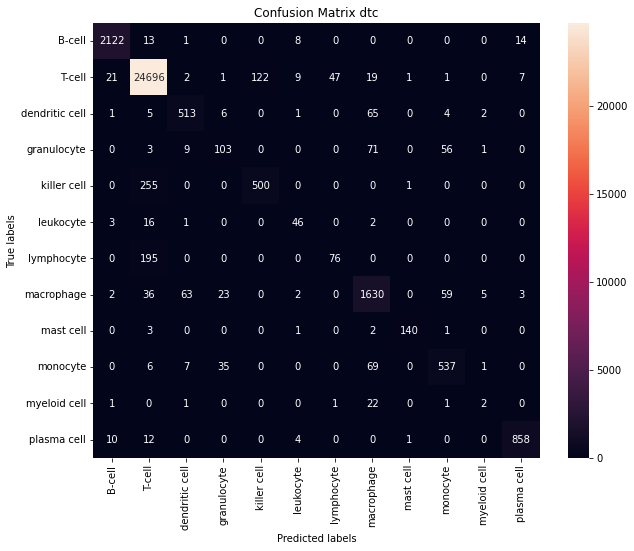

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt     

fig, ax= plt.subplots(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(np.unique(y_train)); ax.yaxis.set_ticklabels(np.unique(y_train));
plt.xticks(rotation=90)
plt.yticks(rotation=0)
ax.set_title('Confusion Matrix dtc'); 
plt.savefig('confusion_matrix_dtc.png')
plt.show()